<a href="https://colab.research.google.com/github/BingHungLee/BHAI-Daily-Practice/blob/main/%5B20210706%5D_EDC_Cracking_Deriviations_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDC Cracking Deriviations Data Preprocessing

https://en.wikipedia.org/wiki/Arrhenius_equation

In [1]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
 # Upload CSV From a local drive
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
dataset= pd.read_csv(filename)

Saving TECHN.csv to TECHN (4).csv


In [3]:
dataset

,temp,p,no,0ppm,200ppm,400ppm,600ppm,800ppm,1000ppm,1200ppm,1400ppm,1600ppm,2000 ppm,2500 ppm
0,324.7,11.40,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,350.0,11.36,1,0.521164,0.522199,0.522365,0.522339,0.522780,0.523014,0.523264,0.523629,0.523948,0.524265,0.524512
2,374.7,11.32,2,1.264740,1.266985,1.270039,1.271721,1.273495,1.274979,1.276487,1.278065,1.279184,1.281570,1.284193
3,399.3,11.27,3,2.323532,2.338824,2.350183,2.359753,2.368227,2.375934,2.383101,2.390065,2.396244,2.407976,2.421589
4,424.0,11.22,4,3.913078,3.971833,4.020674,4.063351,4.101876,4.137400,4.170501,4.201660,4.231296,4.286329,4.349787
5,451.3,11.17,5,7.038567,7.300785,7.531622,7.741569,7.936005,8.118424,8.291328,8.456067,8.614056,8.913114,9.261672
6,460.7,11.11,6,10.306786,10.808612,11.256860,11.666493,12.046700,12.402982,12.739285,13.058335,13.362346,13.931772,14.583877
7,466.0,11.05,7,13.932304,14.660144,15.305010,15.888112,16.421865,16.915613,17.375776,17.807217,18.213583,18.963068,19.803576
8,471.3,11.00,8,18.642807,19.560110,20.359735,21.072657,21.717087,22.307127,22.851570,23.358025,23.831696,24.698040,25.659225
9,476.7,10.94,9,24.359924,25.360992,26.231483,27.005661,27.704718,28.343033,28.931835,29.478745,29.989864,30.923542,31.958382


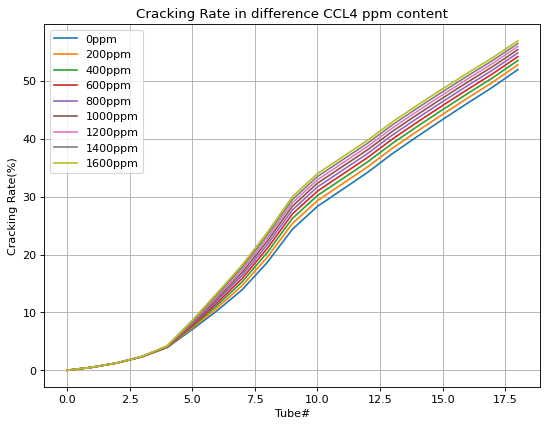

<Figure size 432x288 with 0 Axes>

In [4]:
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

plt.plot(dataset[["no"]],dataset[["0ppm"]],label='0ppm')
plt.plot(dataset[["no"]],dataset[["200ppm"]],label='200ppm')
plt.plot(dataset[["no"]],dataset[["400ppm"]],label='400ppm')
plt.plot(dataset[["no"]],dataset[["600ppm"]],label='600ppm')
plt.plot(dataset[["no"]],dataset[["800ppm"]],label='800ppm')
plt.plot(dataset[["no"]],dataset[["1000ppm"]],label='1000ppm')
plt.plot(dataset[["no"]],dataset[["1200ppm"]],label='1200ppm')
plt.plot(dataset[["no"]],dataset[["1400ppm"]],label='1400ppm')
plt.plot(dataset[["no"]],dataset[["1600ppm"]],label='1600ppm')

plt.title("Cracking Rate in difference CCL4 ppm content",) 
plt.ylabel("Cracking Rate(%)",) 
plt.xlabel("Tube#",)
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("CR.png")

# Defined reactor parameters to calculate reaction rate k

In [5]:
import math

D = 0.2027        # tube inside diameter 0.2027 (m)
L = 18          # tube length 18 (m)
NTube = 18        # Number of tubes
mdot_in_kg = 36000    # In-tube flow rate (kg/hr)
mdot_in_mole = 363.7864  # In-tube flow rate (kmole/hr)

HTA = 0.25*math.pi*0.2027**2*18*18 # Total heat transfer area for whole reactor
HTAperTuber = HTA/18        # heat transfer area per tube

In [6]:
def CtoK(temp):
  return temp+273.15

In [7]:
def PkgGtoatm(pressure):
  return (pressure +1)*0.967841

In [8]:
dataset[["temp"]] = CtoK(dataset[["temp"]]) # Transform temp from celsius to kelvin
dataset[["p"]] = PkgGtoatm(dataset[["p"]]) # Transform pressure from kg/cm2G to atm

# Start Deriviation

In [10]:
case = dataset[["no","temp","p","0ppm"]]
case.

,no,temp,p,0ppm
0,0,597.85,12.001228,0.000000
1,1,623.15,11.962515,0.521164
2,2,647.85,11.923801,1.264740
3,3,672.45,11.875409,2.323532
4,4,697.15,11.827017,3.913078
5,5,724.45,11.778625,7.038567
6,6,733.85,11.720555,10.306786
7,7,739.15,11.662484,13.932304
8,8,744.45,11.614092,18.642807
9,9,749.85,11.556022,24.359924


In [15]:
case.shape[1] # Gives number of columns 
row_count = case.shape[0] # Gives number of rows

In [18]:
EDC = [mdot_in_mole]
for row in 
  EDC[i] = case

[363.7864]